Python and its following libraries are used to analyze Zomato data.

Numpy– With Numpy arrays, complex computations are executed quickly, and large calculations are handled efficiently.
Matplotlib– It has a wide range of features for creating high-quality plots, charts, histograms, scatter plots, and more.
Pandas– The library simplifies the loading of data frames into 2D arrays and provides functions for performing multiple analysis tasks in a single operation.
Seaborn– It offers a high-level interface for creating visually appealing and informative statistical graphics. 
You can use Google Colab Notebook or Jupyter Notebook to simplify your task.

To address our analysis, we need to respond to the subsequent inquiries:

Do a greater number of restaurants provide online delivery as opposed to offline services?
Which types of restaurants are the most favored by the general public?
What price range is preferred by couples for their dinner at restaurants?

In [10]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
zomato_df=pd.read_csv('zomato_data.csv')

In [6]:
zomato_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [7]:
def handledRate(value):
    value=str(value).split('/')
    value=value[0]
    return (float(value))

zomato_df['rate']=zomato_df['rate'].apply(handledRate)

zomato_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='listed_in(type)', ylabel='count'>

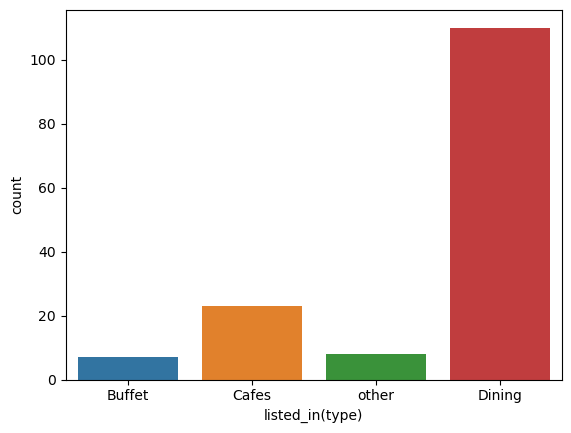

In [8]:
#Do a greater number of restaurants provide online delivery as opposed to offline services?
sns.countplot(x='listed_in(type)',data=zomato_df)

Conclusion: The majority of the restaurants fall into the dining category.

<Axes: xlabel='listed_in(type)', ylabel='count'>

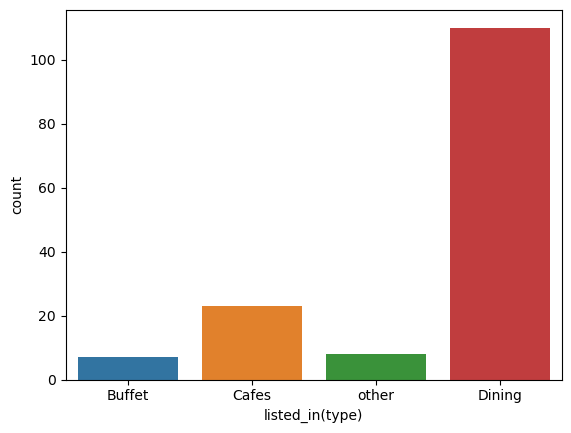

In [9]:
sns.countplot(x='listed_in(type)',data=zomato_df)

Text(0, 0.5, 'Voyes')

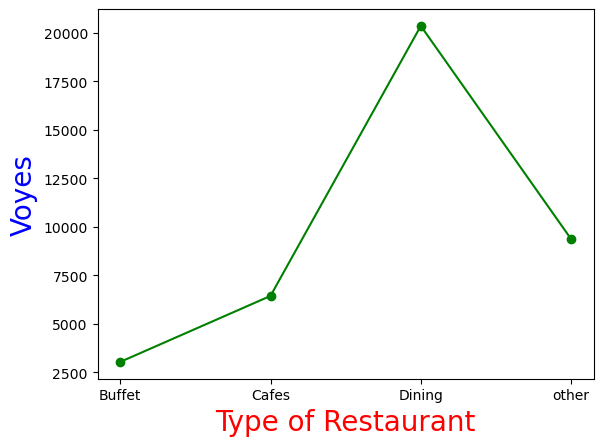

In [16]:
group_data=zomato_df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Type of Restaurant',c='red',size =20)
plt.ylabel('Voyes',c='blue',size=20)

Conclusion: Dining restaurants are preferred by a larger number of individuals.

restaurant’s name that received the maximum votes based on a given

In [25]:
max_votes=zomato_df['votes'].max()
rest_with_max_votes=zomato_df.loc[zomato_df['votes']==max_votes,'name']



In [26]:
print('Restaurant with maximum votes:')
print(rest_with_max_votes)

Restaurant with maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

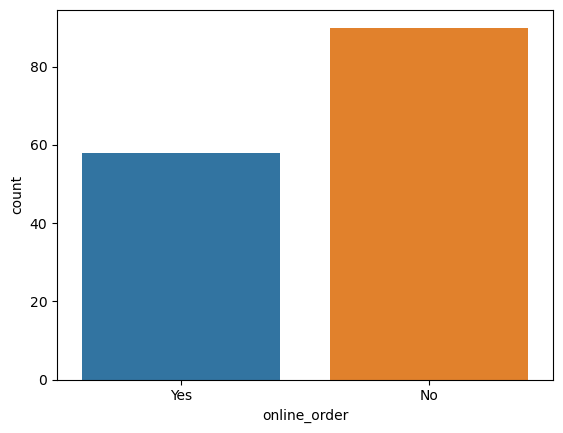

In [35]:
sns.countplot(x='online_order',data=zomato_df)

Conclusion: This suggests that a majority of the restaurants do not accept online orders.

Text(0.5, 1.0, 'Ratings Distribution')

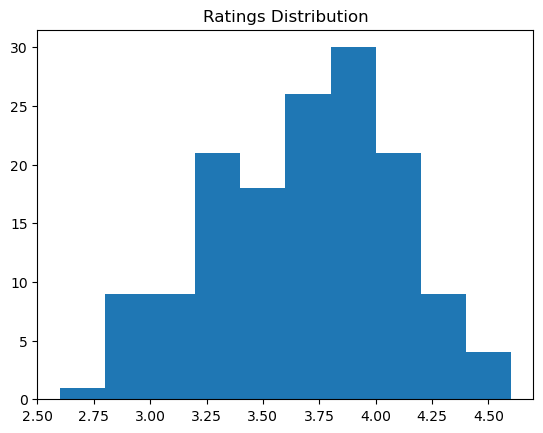

In [38]:
plt.hist(x='rate',data=zomato_df,bins=10)
plt.title('Ratings Distribution')

Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

In [39]:
zomato_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


(array([22., 22., 26., 15., 20., 16.,  2.,  8., 14.,  3.]),
 array([100., 185., 270., 355., 440., 525., 610., 695., 780., 865., 950.]),
 <BarContainer object of 10 artists>)

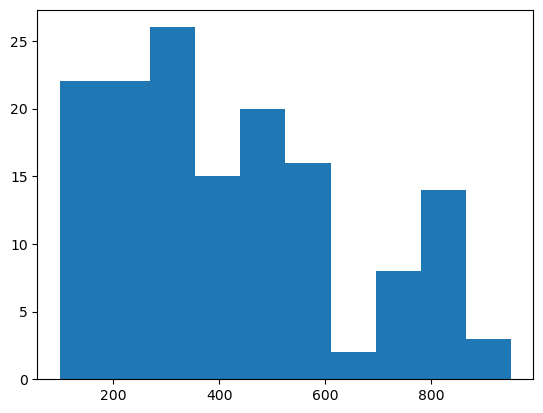

In [40]:
plt.hist(x='approx_cost(for two people)',data=zomato_df)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

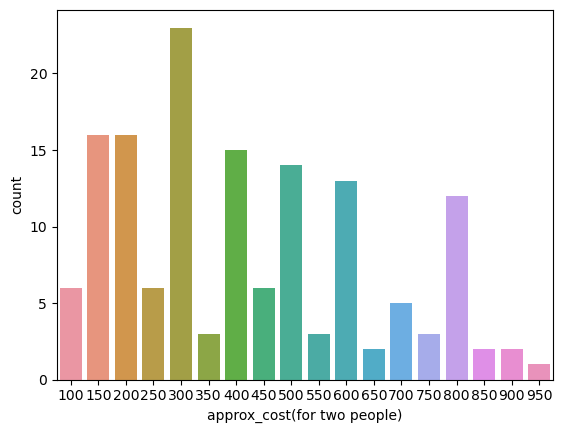

In [42]:
couple_data=zomato_df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

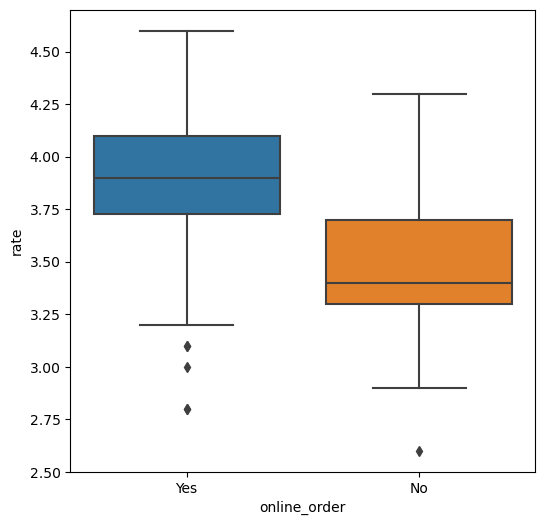

In [46]:
#Now we will examine whether online orders receive higher ratings than offline orders.
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=zomato_df)

CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

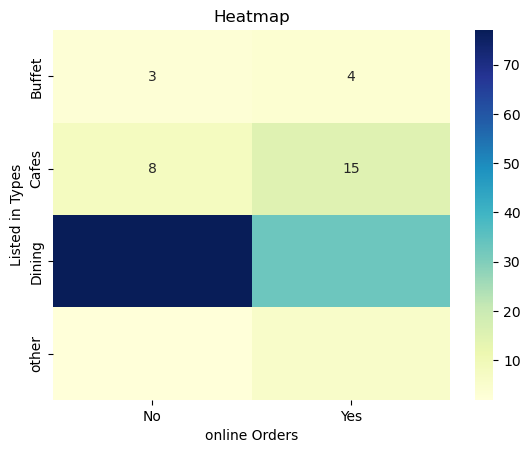

In [57]:
pivot_table=zomato_df.pivot_table(index='listed_in(type)',columns=['online_order'],aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('online Orders')
plt.ylabel('Listed in Types')
plt.show()
                              


CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.